In [1]:
!python --version

Python 3.13.7


In [2]:
import json

with open('week1.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)

list(data.keys())

['Nvidia', 'AMD', 'Intel']

In [3]:
from google import genai
from dotenv import load_dotenv
import os

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY", "")
client = genai.Client(api_key=GEMINI_API_KEY)

In [4]:
summary7day_prompt = """
You are an analyst specializing in the semiconductor industry. 

TASK:
Summarize risks and opportunities for **{chipmaker}** over the last 7 days based on extracted knowledge triplets.

INPUT FORMAT:
Each triplet has:
- subject
- relation (verb + optional detail)
- object

Triplets (past 7 days):
{triplets}

INSTRUCTIONS:
1. Carefully analyze the triplets to identify signals of **risks** (e.g., export restrictions, regulatory scrutiny, market struggles, competition, delays).
2. Identify **opportunities** (e.g., new product launches, strong demand, partnerships, positive analyst ratings, technological advances).
3. For each risk or opportunity, **cite the supporting triplet** in this format:
   subject -(verb[/detail])-> object
   Example: China -(scrutinizes)-> Nvidia
4. Organize into two sections:
   - **Risks for {chipmaker}**
   - **Opportunities for {chipmaker}**
5. At the end, write a **short summary outlook** combining both risks and opportunities.

OUTPUT FORMAT:
Risks for {chipmaker}:
- [triplet] → explanation
- ...

Opportunities for {chipmaker}:
- [triplet] → explanation
- ...

Outlook:
<short paragraph>
"""

In [5]:
chipmaker = "Nvidia"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of risks and opportunities for Nvidia over the last 7 days based on the provided knowledge triplets:

### Risks for Nvidia:
*   `Nvidia -(violates/anti-monopoly laws)-> China` → Accusations of violating anti-monopoly laws in China could lead to penalties and market restrictions.
*   `Nvidia -(faces/antitrust probe in December 2024)-> SAMR` → An impending antitrust probe by China's SAMR poses significant regulatory risk and potential market disruption.
*   `Nvidia -(is/at the heart of)-> tensions` → Being central to US-China geopolitical tensions creates inherent business instability and uncertainty.
*   `US -(requires/export license for H20 chip in April)-> Nvidia` → Ongoing US export restrictions for key chips like H20 limit market access and sales, particularly in China.
*   `Nvidia -(faces/H20 chip ban in April)-> China` → Direct bans on high-performance chips in China severely curtail revenue potential in a 

In [6]:
chipmaker = "AMD"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

As an analyst specializing in the semiconductor industry, here's a summary of AMD's risks and opportunities over the last 7 days based on the provided knowledge triplets:

### Risks for AMD:

*   **Regulatory & Geopolitical Costs:**
    *   AMD -(agree/to pay 15% chip tax for licenses to China)-> tax → AMD faces a significant 15% chip tax or revenue cut in China, impacting margins in a crucial market.
    *   AMD -(gives/15% revenue cut in China)-> Government → Reinforces the financial impact of doing business in China.
*   **Competitive Disadvantages & Market Share Challenges:**
    *   MSI -(pass/on offerings)-> AMD → A key partner (MSI) is passing on AMD's offerings, indicating potential struggles in securing design wins or competitive pressure.
    *   NVIDIA -(outperform/Radeon in ray tracing)-> AMD → Radeon GPUs are still lagging NVIDIA in ray tracing performance, a critical feature in modern graphics.
    *   AMD -(has/lags Blackwell Ultra)-> MI355X → AMD's MI355X AI chip is ack

In [7]:
chipmaker = "Intel"
triplets = [t for d in data[chipmaker] for t in d['triplets']]

response = client.models.generate_content(
    model="gemini-2.5-flash", 
    contents=summary7day_prompt.format(
        chipmaker=chipmaker, 
        triplets=triplets
    )
)

print(response.text)

Here's a summary of risks and opportunities for Intel over the last 7 days:

### Risks for Intel:

*   **Significant Financial Performance Issues:**
    *   Intel -(records/$18.8 billion loss (2024))-> loss → Intel reported a substantial $18.8 billion loss for 2024, indicating significant financial challenges.
*   **Workforce Reductions and Talent Drain:**
    *   Intel -(reduces/over fifth smaller)-> workforce → A major reduction in Intel's workforce (over a fifth smaller) points to severe cost-cutting and potential loss of valuable expertise.
    *   Intel -(performs)-> layoffs → General layoffs underscore ongoing efforts to trim expenses, which can impact employee morale and productivity.
    *   Intel -(loses/Linux engineering)-> talent → The loss of Linux engineering talent could hinder development and support crucial for open-source and enterprise platforms.
    *   Intel -(loses/second chief Xeon)-> architect → Losing a second chief Xeon architect is a significant blow to a crit

In [8]:
import networkx as nx

G = nx.MultiDiGraph()

for chipmaker in data:
    for d in data[chipmaker]:
        date = d['date']
        for triplet in d['triplets']:
            subject = triplet['subject']
            relation = triplet['relation']
            object_ = triplet['object']

            verb = relation.get("verb")
            detail = relation.get("detail")

            G.add_edge(
                subject,
                object_,
                key=verb,
                verb=verb,
                detail=detail,
                date=date,
                chipmaker=chipmaker
            )

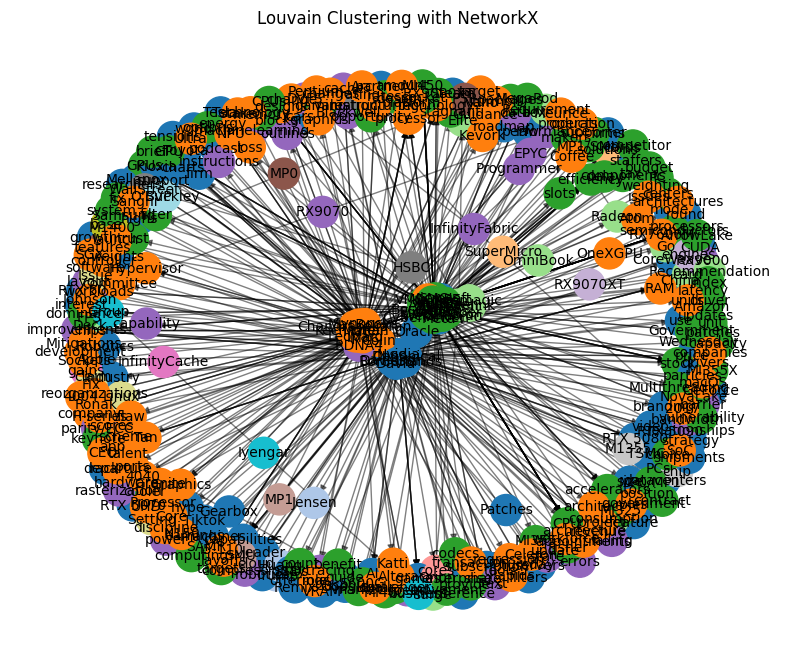

In [9]:
import matplotlib.pyplot as plt

communities = nx.community.louvain_communities(G, seed=123)

community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

pos = nx.spring_layout(G, seed=42)
node_colors = [community_map[n] for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title("Louvain Clustering with NetworkX")
plt.axis("off")
plt.show()